# Logistic Regression

### Data preprocessing

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split # for training and testing split
from sklearn.preprocessing import StandardScaler # for Feature scaling
from sklearn.linear_model import LogisticRegression # for classifier
from sklearn.metrics import confusion_matrix # for making confusion matrix
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [6]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
X[0:10, :]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]])

In [8]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [9]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [12]:
X_train[0:10, :]

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264]])

### Fitting Logistic Regression to the Training Set

In [13]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting Test set result

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred[0:15]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [16]:
y_test[0:15]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

* * *

**This prediction looks good.**

* * *

### Making the Confusion Matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[50,  2],
       [ 8, 20]])

* * *

**classifier made 50 + 20 = 70 correct prediction and 8 + 2 = 10 incoreect predictions.**

* * *

### Visualizing the training set results

In [19]:
from matplotlib.colors import ListedColormap

In [37]:
X_set, y_set = X_train, y_train

In [38]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                              stop = X_set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                              stop = X_set[:, 1].max() +1, step = 0.01))

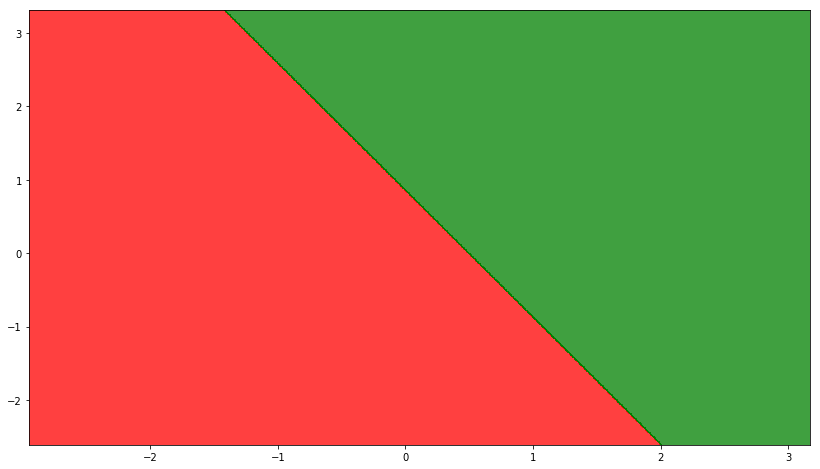

In [39]:
# plot the contour
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('red', 'green')))

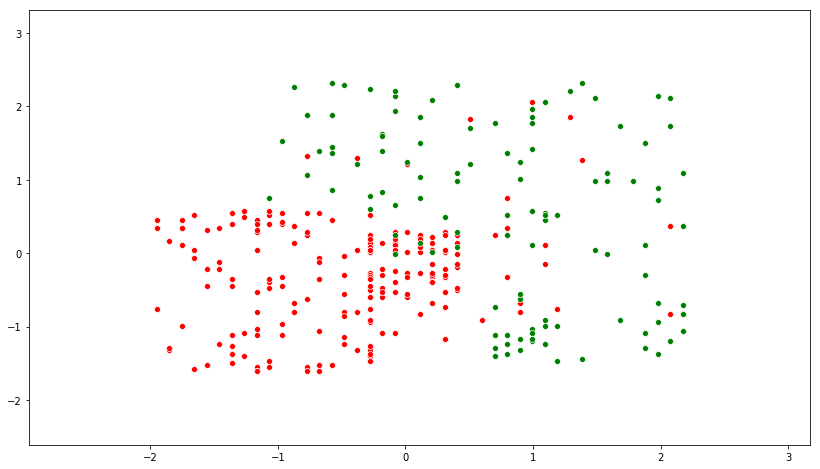

In [40]:
# plot the points
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)

#### Merging above plots and labeling axis

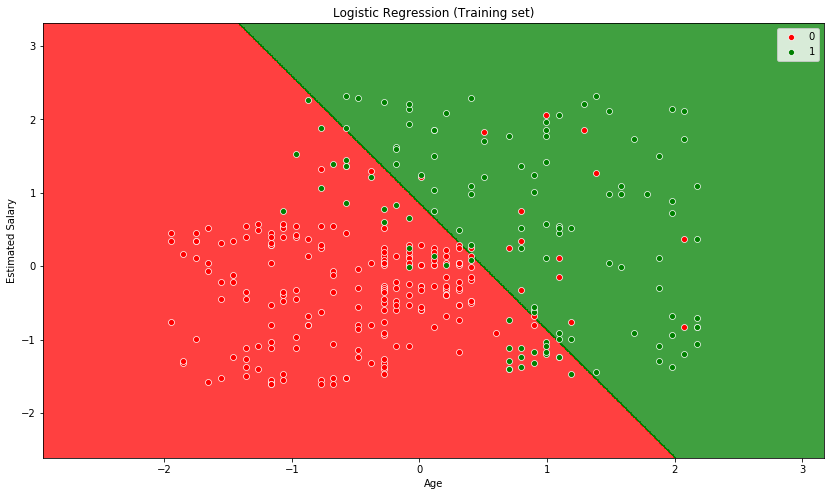

In [41]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

### Visualizing the test set results

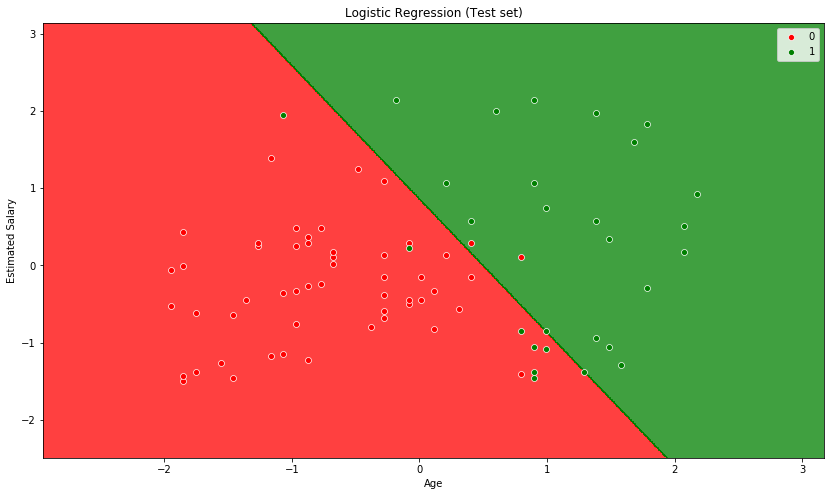

In [42]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                              stop = X_set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                              stop = X_set[:, 1].max() +1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,
            cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()